This project is to analysis the dataset of insurances in Florida handled by a particular company .The dataset is public and legal and free of cost https://support.spatialkey.com/spatialkey-sample-csv-data .This involve data cleaning,data retriving ,
comparision to obtain hypothese , data visualization and ploting.

# DATA CLEANING

The required packages are imported for analysis
In Data cleaning we just read the csv file into pandas dataframe  and verified whether any null values or the data is clean.Check the datatypes for future usage .If there are any null values we can just remove it  .If the data is clean we proceed with another module.

In [16]:
#Read the data from csv file into pandas dataframe
import pandas as pd
import numpy as np
import csv
import descartes
import geopandas as gpd
from shapely.geometry import Point, polygon
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
df = pd.read_csv("C:\\Users\\madhu\\Desktop\\Copy of FL_insurance_sample.csv")
df.head()

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1


In [2]:
#number of null values in the dataset
df.isnull().sum()


policyID              0
statecode             0
county                0
eq_site_limit         0
hu_site_limit         0
fl_site_limit         0
fr_site_limit         0
tiv_2011              0
tiv_2012              0
eq_site_deductible    0
hu_site_deductible    0
fl_site_deductible    0
fr_site_deductible    0
point_latitude        0
point_longitude       0
line                  0
construction          0
point_granularity     0
dtype: int64

In [4]:
# not null function
df.notnull().sum()

policyID              36634
statecode             36634
county                36634
eq_site_limit         36634
hu_site_limit         36634
fl_site_limit         36634
fr_site_limit         36634
tiv_2011              36634
tiv_2012              36634
eq_site_deductible    36634
hu_site_deductible    36634
fl_site_deductible    36634
fr_site_deductible    36634
point_latitude        36634
point_longitude       36634
line                  36634
construction          36634
point_granularity     36634
dtype: int64

In [6]:
df.dtypes

policyID                int64
statecode              object
county                 object
eq_site_limit         float64
hu_site_limit         float64
fl_site_limit         float64
fr_site_limit         float64
tiv_2011              float64
tiv_2012              float64
eq_site_deductible    float64
hu_site_deductible    float64
fl_site_deductible    float64
fr_site_deductible      int64
point_latitude        float64
point_longitude       float64
line                   object
construction           object
point_granularity       int64
dtype: object

# DATA RETRIEVAL

Data retrieval with help of various parameters in the dataset.In this we retrive the values of all the people maintaing the insurance with the help of county ,construction,line with the help of groupby() method in the dataframe

In [69]:
#Get the details of all the employess in a particular county:
C = input('enter the county: ')
grp = df.groupby('county') 
grp.get_group(C ) 

enter the county: UNION COUNTY


,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity,Increased
398,591943,FL,UNION COUNTY,407520.0,407520.00,407520.0,407520.0,407520.00,652935.06,0.0,0.0,0.0,0,30.023390,-82.341400,Residential,Masonry,3,Yes
399,973133,FL,UNION COUNTY,137160.0,137160.00,137160.0,137160.0,137160.00,235651.85,0.0,0.0,0.0,0,30.023390,-82.341400,Residential,Wood,3,Yes
400,743965,FL,UNION COUNTY,123300.0,123300.00,123300.0,123300.0,123300.00,117740.65,0.0,0.0,0.0,0,30.027560,-82.331260,Residential,Wood,1,No
401,528185,FL,UNION COUNTY,0.0,37823.84,0.0,0.0,37823.84,66198.38,0.0,0.0,0.0,0,29.934589,-82.409576,Residential,Wood,3,Yes
402,219113,FL,UNION COUNTY,0.0,181487.52,0.0,0.0,181487.52,272492.62,0.0,0.0,0.0,0,30.024082,-82.338158,Residential,Wood,3,Yes
403,376803,FL,UNION COUNTY,0.0,948148.79,0.0,0.0,948148.79,1344182.96,0.0,0.0,0.0,0,30.017946,-82.344803,Residential,Masonry,1,Yes
1041,642061,FL,UNION COUNTY,88508.7,88508.70,88508.7,88508.7,88508.70,133692.39,0.0,0.0,0.0,0,28.511848,-81.155983,Residential,Wood,4,Yes
1042,623689,FL,UNION COUNTY,0.0,818872.99,0.0,0.0,818872.99,1155925.21,0.0,0.0,0.0,0,30.075600,-82.218500,Residential,Masonry,4,Yes
10616,441617,FL,UNION COUNTY,54000.0,54000.00,54000.0,54000.0,54000.00,62952.55,0.0,0.0,0.0,0,29.928200,-82.424300,Residential,Wood,3,Yes
10617,662856,FL,UNION COUNTY,0.0,36494.90,0.0,0.0,36494.90,33234.30,0.0,0.0,0.0,0,29.929211,-82.424080,Residential,Wood,1,No


In [5]:
C1 = input('enter the construction: ')
grp = df.groupby('construction') 
grp.get_group(C1 ) 

enter the construction: Steel Frame


,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
413,407962,FL,COLUMBIA COUNTY,0.0,129600000.0,0.0,0.0,129600000.0,120600000.0,0.0,0.0,0.0,0,30.232008,-82.638557,Commercial,Steel Frame,3
1491,896829,FL,DUVAL COUNTY,49410000.0,49410000.0,49410000.0,49410000.0,49410000.0,84780000.0,0.0,0.0,0.0,0,30.140962,-81.533128,Commercial,Steel Frame,4
1535,858672,FL,FLAGLER COUNTY,0.0,44910000.0,0.0,44910000.0,44910000.0,49410000.0,0.0,0.0,0.0,0,29.471950,-81.245700,Commercial,Steel Frame,3
1610,181082,FL,VOLUSIA COUNTY,0.0,302400000.0,0.0,0.0,302400000.0,377100000.0,0.0,0.0,0.0,0,29.242878,-81.109253,Commercial,Steel Frame,4
1753,536035,FL,VOLUSIA COUNTY,82260000.0,82260000.0,82260000.0,82260000.0,82260000.0,84690000.0,0.0,0.0,0.0,0,29.231760,-81.010120,Commercial,Steel Frame,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34552,407001,FL,CITRUS COUNTY,104400000.0,104400000.0,104400000.0,104400000.0,104400000.0,96300000.0,0.0,0.0,0.0,0,28.950718,-82.625893,Commercial,Steel Frame,1
35034,202351,FL,MARION COUNTY,0.0,40590000.0,0.0,0.0,40590000.0,46710000.0,0.0,0.0,0.0,0,29.188120,-82.137817,Commercial,Steel Frame,3
36104,463464,FL,HERNANDO COUNTY,171900000.0,171900000.0,171900000.0,171900000.0,171900000.0,125100000.0,0.0,0.0,0.0,0,28.533319,-82.534676,Commercial,Steel Frame,1
36205,556096,FL,PASCO COUNTY,0.0,108000000.0,0.0,108000000.0,108000000.0,135900000.0,0.0,0.0,0.0,0,28.254320,-82.714470,Commercial,Steel Frame,1


In [12]:
L = input('enter the line: ')
grp = df.groupby('line') 
grp.get_group(L ) 

enter the line: Commercial


,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity
6,995932,FL,CLAY COUNTY,0.0,19260000.00,0.0,0.0,19260000.00,20610000.00,0.0,0.0,0.0,0,30.102226,-81.713882,Commercial,Reinforced Concrete,1
21,671392,FL,CLAY COUNTY,0.0,13410000.00,0.0,0.0,13410000.00,11700000.00,0.0,0.0,0.0,0,30.091921,-81.711929,Commercial,Reinforced Concrete,3
66,477786,FL,NASSAU COUNTY,2115760.5,2115760.50,0.0,0.0,2115760.50,3057739.39,0.0,0.0,0.0,0,30.557900,-81.824900,Commercial,Reinforced Masonry,4
92,233271,FL,COLUMBIA COUNTY,0.0,2135964.60,0.0,2135964.6,2135964.60,1728721.59,0.0,0.0,0.0,0,30.163641,-82.640976,Commercial,Reinforced Masonry,1
94,641952,FL,COLUMBIA COUNTY,0.0,2469639.60,0.0,2469639.6,2469639.60,2708463.63,0.0,0.0,0.0,0,30.151500,-82.612600,Commercial,Reinforced Masonry,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36598,111949,FL,PINELLAS COUNTY,0.0,1868055.46,0.0,0.0,1868055.46,2251630.75,0.0,0.0,0.0,0,28.044390,-82.679130,Commercial,Reinforced Masonry,1
36600,657015,FL,PINELLAS COUNTY,0.0,18990000.00,0.0,18990000.0,18990000.00,29880000.00,0.0,0.0,0.0,0,28.036644,-82.657860,Commercial,Reinforced Concrete,1
36609,196088,FL,PINELLAS COUNTY,1917403.2,1917403.20,1917403.2,1917403.2,1917403.20,3302918.75,0.0,0.0,0.0,0,28.081780,-82.748710,Commercial,Reinforced Masonry,1
36617,575194,FL,PINELLAS COUNTY,0.0,3759303.60,0.0,3759303.6,3759303.60,4209183.22,0.0,0.0,0.0,0,28.122885,-82.770218,Commercial,Reinforced Masonry,3


# DATA COMPARISION HYPOTHSES

In this hypothses we compare the two columns (tiv_2011,tiv_2012) 
One of the hypothese is to show whether the total insured value is increased or not in both the years
Another hypothese is to show whether the number of households increased over the both years.
plot the values in bar graph to visualize the value differnece.

In [107]:
#To show whether the total insured value is increased or not over the year 2011 and 2012
df.loc[df['tiv_2012'] > df['tiv_2011'], 'Increased']= 'Yes'
df.loc[df['tiv_2012'] < df['tiv_2011'], 'Increased']= 'No'
df

,policyID,statecode,county,eq_site_limit,hu_site_limit,fl_site_limit,fr_site_limit,tiv_2011,tiv_2012,eq_site_deductible,hu_site_deductible,fl_site_deductible,fr_site_deductible,point_latitude,point_longitude,line,construction,point_granularity,Increased
0,119736,FL,CLAY COUNTY,498960.0,498960.00,498960.0,498960.0,498960.00,792148.90,0.0,9979.2,0.0,0,30.102261,-81.711777,Residential,Masonry,1,Yes
1,448094,FL,CLAY COUNTY,1322376.3,1322376.30,1322376.3,1322376.3,1322376.30,1438163.57,0.0,0.0,0.0,0,30.063936,-81.707664,Residential,Masonry,3,Yes
2,206893,FL,CLAY COUNTY,190724.4,190724.40,190724.4,190724.4,190724.40,192476.78,0.0,0.0,0.0,0,30.089579,-81.700455,Residential,Wood,1,Yes
3,333743,FL,CLAY COUNTY,0.0,79520.76,0.0,0.0,79520.76,86854.48,0.0,0.0,0.0,0,30.063236,-81.707703,Residential,Wood,3,Yes
4,172534,FL,CLAY COUNTY,0.0,254281.50,0.0,254281.5,254281.50,246144.49,0.0,0.0,0.0,0,30.060614,-81.702675,Residential,Wood,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36629,404309,FL,PINELLAS COUNTY,0.0,88722.00,0.0,88722.0,88722.00,155065.65,0.0,0.0,0.0,0,28.122885,-82.770218,Residential,Wood,3,Yes
36630,465875,FL,PINELLAS COUNTY,1297057.5,1297057.50,1297057.5,1297057.5,1297057.50,1577500.79,0.0,0.0,0.0,0,28.080900,-82.758800,Residential,Masonry,1,Yes
36631,791209,FL,PINELLAS COUNTY,173286.9,173286.90,0.0,0.0,173286.90,205527.97,0.0,0.0,0.0,0,28.110550,-82.766360,Residential,Wood,4,Yes
36632,322627,FL,PINELLAS COUNTY,1499781.6,1499781.60,0.0,0.0,1499781.60,1768782.43,0.0,0.0,0.0,0,28.089415,-82.697411,Residential,Masonry,3,Yes


2172875.000322928
2571004.0973420837


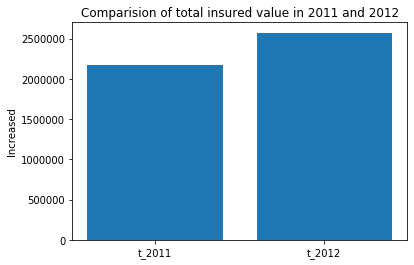

In [62]:
#To show the in which year the amount insured is more:
t_2011 = print(df['tiv_2011'].mean())
t_2012 = print(df['tiv_2012'].mean())


#Plotting the mean using bar graph:
objects = ('t_2011','t_2012')
y_pos = np.arange(len(objects))
Values = [2172875.0,2571004.0]
plt.bar(y_pos, Values, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Increased')
plt.title('Comparision of total insured value in 2011 and 2012')

plt.show()

In [19]:
#To show number of households insured in year 2011 and 2012 is increased or not for each county:
A = df.groupby('county').count()[['tiv_2011','tiv_2012']]
print(A)
A.mean()



                   tiv_2011  tiv_2012
county                               
ALACHUA COUNTY          973       973
BAKER COUNTY             70        70
BAY COUNTY              403       403
BRADFORD COUNTY          31        31
BREVARD COUNTY          872       872
...                     ...       ...
UNION COUNTY             15        15
VOLUSIA COUNTY         1367      1367
WAKULLA COUNTY           85        85
WALTON COUNTY           288       288
WASHINGTON COUNTY       116       116

[67 rows x 2 columns]


tiv_2011    546.776119
tiv_2012    546.776119
dtype: float64

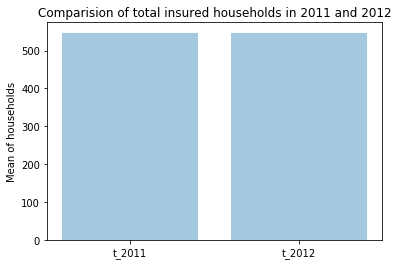

In [24]:
objects = ('t_2011','t_2012')
y_pos = np.arange(len(objects))
Mean = [546.77,546.77]
plt.bar(y_pos, Mean, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Mean of households')
plt.title('Comparision of total insured households in 2011 and 2012')

plt.show()


From the bar graph we can easily conclude the hypothese that the number of insured households are same and there is no change in the insured households from 2011 to 2012.

# DATA VISUALIZATION

Visualization is used to show the relationship between the values and also to show which kind of line and construction is most preferred by the people 

        1.The first visualization is used to show whether the values are depndent or randomly provided
        2.The second visualization is used to show which line and construction is prefered the most.
        3.The third visualization is used to plot counties of florida in the world map
        4.The fourth visualization is used to show the policyID in a scatter plot with the help of latitude and longitude values.

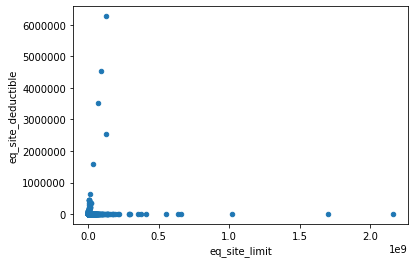

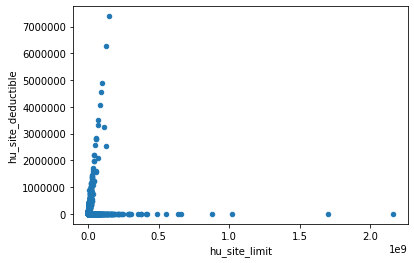

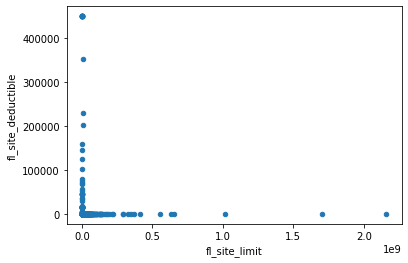

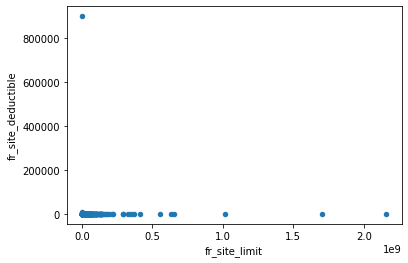

In [31]:
#Scatter ploting to show that each data is dependent to each other in a dataset
df.plot.scatter( x = 'eq_site_limit', y = 'eq_site_deductible')
df.plot.scatter( x = 'hu_site_limit', y = 'hu_site_deductible')
df.plot.scatter( x = 'fl_site_limit', y = 'fl_site_deductible')
df.plot.scatter( x = 'fr_site_limit', y = 'fr_site_deductible')

#we can take various parameter to show the dependence between the limit and dedcutible 

This scatter plot shows that all the column values are dependent with each other since it is not randomly scattered in the plot and it follows a pattern to show the dependence.

In [48]:
#To show which construction is more:
df['construction'].value_counts()



Wood                   21581
Masonry                 9257
Reinforced Masonry      4225
Reinforced Concrete     1299
Steel Frame              272
Name: construction, dtype: int64

In [46]:
df['line'].value_counts()


Residential    30838
Commercial      5796
Name: line, dtype: int64

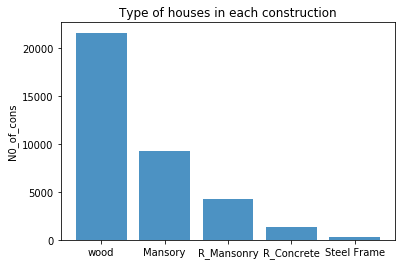

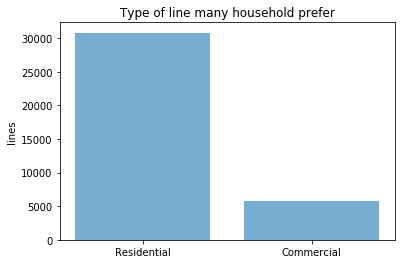

In [49]:
objects = ('wood','Mansory','R_Mansonry','R_Concrete','Steel Frame')
y_pos = np.arange(len(objects))
Totals = [21581,9257,4225,1299,272]
plt.bar(y_pos, Totals, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('N0_of_cons')
plt.title('Type of houses in each construction')

plt.show()

objects = ('Residential','Commercial')
y_pos = np.arange(len(objects))
Totals = [30838,5796]
plt.bar(y_pos, Totals, align='center', alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('lines')
plt.title('Type of line many household prefer')

plt.show()







From this visulaization we can say that wood is the most preferred construction for insurance in florida and residential line is the most insured line in florida.

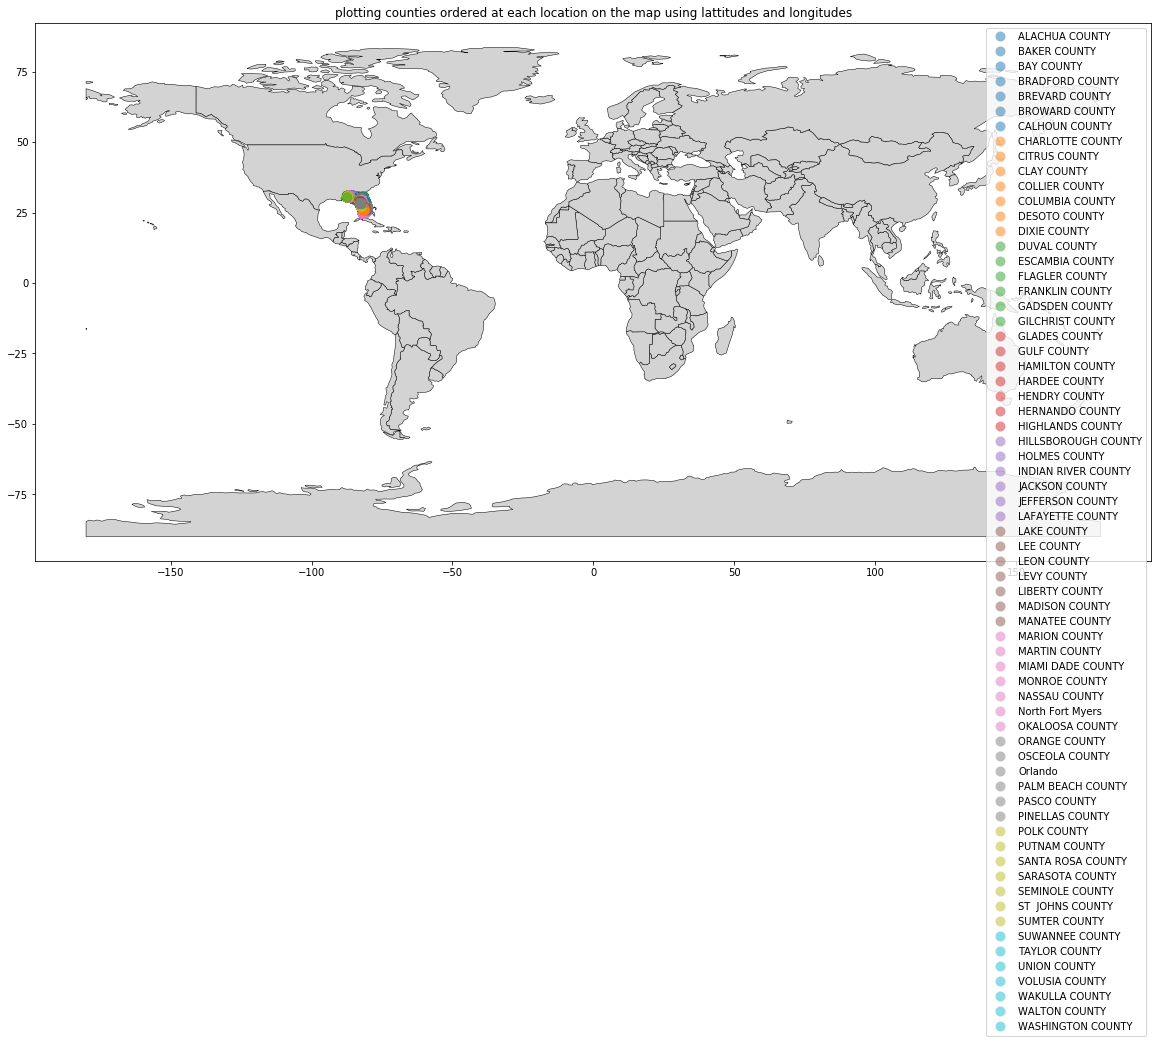

In [24]:
df = pd.read_csv("C:\\Users\\madhu\\Desktop\\Copy of FL_insurance_sample.csv")

def make_point(row):
    return Point(row.point_longitude, row.point_latitude)
points = df.apply(make_point, axis=1)
Geo_df= gpd.GeoDataFrame(df, geometry=points)
Geo_df.crs = {'init': 'epsg:4326'}

ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='Black', figsize=(20,10))
Geo_df.plot(markersize=80, alpha=0.5, ax=ax,column='county',legend='True')
_=plt.title('plotting counties ordered at each location on the map using lattitudes and longitudes')

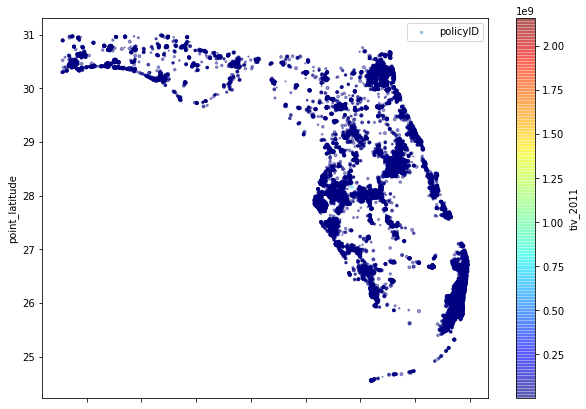

In [59]:
df.plot(kind="scatter", x="point_longitude", y="point_latitude",
    s=df['policyID']/100000, label="policyID",
    c="tiv_2011", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

This scatter plot shows the florida with the help of longitude and latitude values and plot the policyID.

Conclusion:From the analysis we can provide hypothese by comparision and visualize the data in various patterns to show the relation and locate the data .